# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
#adding in additional dependencies
from pprint import pprint
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
# pip install citypy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [31]:
# url call - use a city to figure out the json structure for the data
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}units={units}&appid={weather_api_key}&q="

# Get weather data
# #f"{base_url}appid={weather_api_key}&units={units}&q"
# Look at the json to figure out the structure of data
# response = requests.get(query_url).json()
# pprint(response)

# # create lists of all the data elements
city_id = []
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
temp = []
wind_speed = []

# # for loop through the data
for city in cities:
    response = requests.get(query_url + city).json()
    
    # try and except clause while appending the data
    try:
        city_id.append(response['id'])
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        print(f"City Name: {city_name}, City ID: {city_id}")
    except:
        print(f"That record for {city_name} doesn't not exsist. ")
    
    



City Name: ['Fortuna'], City ID: [5563839]
City Name: ['Fortuna', "Severo-Kuril'sk"], City ID: [5563839, 2121385]
City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp'], City ID: [5563839, 2121385, 1015776]
City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer'], City ID: [5563839, 2121385, 1015776, 5864145]
City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini'], City ID: [5563839, 2121385, 1015776, 5864145, 4032243]
City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork'], City ID: [5563839, 2121385, 1015776, 5864145, 4032243, 3092472]
City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui'], City ID: [5563839, 2121385, 1015776, 5864145, 4032243, 3092472, 1154689]
City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik'], City ID: [5563839, 2121385, 1015776, 5864145, 4032243, 3092472, 1154689, 3421765]
City Name: ['Fortuna', "Severo-Kuri

That record for ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk'] doesn't not exsist. 
That record for ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk'] doesn't not exsist. 
City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo 

That record for ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe'] doesn't not exsist. 
City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui'],

That record for ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart'] doesn't not exsist. 
City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro M

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo'], City ID: [5563839, 2121385, 1015776, 5864145, 4032243, 3092472, 1154689, 3421765, 2264557, 2022083, 1507390, 2022572, 2450173, 5072006, 4030556, 3366880, 535711, 5106841, 6089245, 321082, 3985710, 6148373, 2126123, 6201424, 2015306, 2155415, 3386213, 2361373, 6185377, 6165406, 1519580, 2126199, 3453741, 5282297, 3146487, 4317412, 3374210, 3443061, 3354071, 388345

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth'], City ID: [5563839, 2121385, 1015776, 5864145, 4032243, 3092472, 1154689, 3421765, 2264557, 2022083, 1507390, 2022572, 2450173, 5072006, 4030556, 3366880, 535711, 5106841, 6089245, 321082, 3985710, 6148373, 2126123, 6201424, 2015306, 2155415, 3386213, 2361373, 6185377, 6165406, 1519580, 2126199, 3453

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow'], City ID: [5563839, 2121385, 1015776, 5864145, 4032243, 3092472, 1154689, 3421765, 2264557, 2022083, 1507390, 2022572, 2450173, 5072006, 4030556, 3366880, 535711, 5106841, 6089245, 321082, 3985710, 6148373, 2126123, 620142

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb'], City ID: [5563839, 2121385, 1015776, 5864145, 4032243, 3092472, 1154689, 3421765, 2264557, 2022083, 1507390, 2022572, 2450173, 5072006, 4030556, 3

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia'], City ID: [5563839, 2121385, 1015776, 5864145, 4032243, 309

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo'], City ID: [

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

That record for ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahéb

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

That record for ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahéb

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

That record for ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahéb

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

That record for ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahéb

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

That record for ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahéb

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

That record for ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahéb

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

That record for ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahéb

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

That record for ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahéb

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

That record for ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahéb

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

That record for ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahéb

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

That record for ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahéb

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

That record for ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahéb

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

That record for ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahéb

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

That record for ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahéb

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

That record for ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahéb

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

That record for ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahéb

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

That record for ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahéb

That record for ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahéb

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

That record for ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahéb

That record for ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahéb

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

That record for ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahéb

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

That record for ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahéb

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

That record for ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahéb

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

That record for ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahéb

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

That record for ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahéb

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

That record for ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahéb

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

That record for ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahéb

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

City Name: ['Fortuna', "Severo-Kuril'sk", 'Bredasdorp', 'Homer', 'Vaini', 'Malbork', 'Ko Samui', 'Nanortalik', 'Ponta do Sol', 'Alekseyevsk', 'Dikson', 'Khatanga', 'Taoudenni', 'Lincoln', 'Rikitea', 'Hermanus', 'Lesnoye', 'Albany', 'Norman Wells', 'Bingöl', 'Cabo San Lucas', 'Sioux Lookout', 'Chokurdakh', 'Mataura', 'Tiksi', 'New Norfolk', 'Touros', 'Diapaga', 'Yellowknife', 'Thompson', 'Saryozek', 'Cherskiy', 'Pinheiro Machado', 'Bethel', 'Raudeberg', 'Bogalusa', 'São Filipe', 'Chui', 'Oranjemund', 'Lebu', 'George Town', 'Birjand', 'Hobart', 'Bambous Virieux', 'Ixtapa', 'Babstovo', 'Ostrovnoy', 'Lompoc', 'Hithadhoo', 'Hilo', 'Butaritari', 'Kinsale', 'Ilulissat', 'Roald', 'Port Elizabeth', 'Port Lincoln', 'Mutsu', 'Tasiilaq', 'Jacksonville Beach', 'Atuona', 'Barrow', 'Bengkulu', 'Ribeira Grande', 'Sitka', 'Thinadhoo', 'Nikolskoye', 'Abnūb', 'Busselton', 'Cape Town', 'Chateaubelair', 'Arraial do Cabo', 'Mitsamiouli', 'Ushuaia', 'Hasaki', 'Punta Arenas', 'Mago', 'Porto-Novo', 'Mahébourg'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
# create a DataFrame
city_weather_df = pd.DataFrame({
    "City": city_name,
    "Lat": lat,
    "lng": lng,
    "Temp": temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
})

city_weather_df

,City,Lat,lng,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fortuna,40.5982,-124.1573,62.47,91,90,6.91,US,1625170546
1,Severo-Kuril'sk,50.6789,156.1250,46.53,90,59,14.56,RU,1625170730
2,Bredasdorp,-34.5322,20.0403,52.92,82,67,5.75,ZA,1625170730
3,Homer,59.6425,-151.5483,56.14,72,1,6.91,US,1625170730
4,Vaini,-21.2000,-175.2000,69.96,94,90,3.44,TO,1625170731
...,...,...,...,...,...,...,...,...,...
568,Canberra,-35.2835,149.1281,46.71,94,90,4.61,AU,1625170966
569,Oddur,4.1213,43.8894,74.03,56,95,19.95,SO,1625170967
570,‘Ewa Beach,21.3156,-158.0072,83.52,51,75,17.00,US,1625170967
571,Butiá,-30.1197,-51.9622,56.14,80,72,2.73,BR,1625170967


In [33]:
# export csv to file


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [34]:
# Look for the high humidity value
print(city_weather_df.describe())

              Lat         lng        Temp    Humidity  Cloudiness  Wind Speed  \
count  573.000000  573.000000  573.000000  573.000000  573.000000  573.000000   
mean    20.884586   15.928472   68.341483   69.933682   51.169284    7.879651   
std     34.200459   90.753580   14.488984   21.984478   38.613663    5.715288   
min    -54.800000 -175.200000   31.100000    8.000000    0.000000    0.000000   
25%     -7.506100  -64.497800   57.250000   58.000000   10.000000    3.800000   
50%     25.293400   20.866700   70.180000   76.000000   50.000000    6.640000   
75%     50.830900   96.065000   79.270000   87.000000   90.000000   10.360000   
max     78.218600  179.316700  106.380000  100.000000  100.000000   34.760000   

               Date  
count  5.730000e+02  
mean   1.625171e+09  
std    9.737303e+01  
min    1.625170e+09  
25%    1.625171e+09  
50%    1.625171e+09  
75%    1.625171e+09  
max    1.625171e+09  


In [28]:
#  Get the indices of cities that have humidity over 100%.
sample_humidity = city_weather_df['Humidity'] > 100
sample_humidity

0      False
1      False
2      False
3      False
4      False
       ...  
568    False
569    False
570    False
571    False
572    False
Name: Humidity, Length: 573, dtype: bool

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

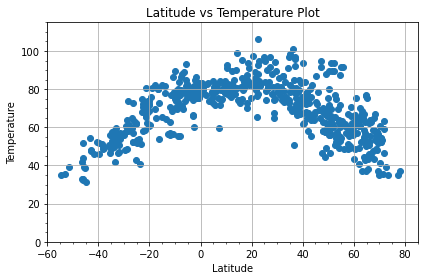

In [50]:
# scatter plot for Latitude vs Temperature Plot
x_values = city_weather_df['Lat']
y_values = city_weather_df['Temp']

plt.scatter(x_values, y_values)
plt.title('Latitude vs Temperature Plot')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.ylim(0, 115)
plt.xlim(-60, 85)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.tight_layout()
plt.show()

## Latitude vs. Humidity Plot

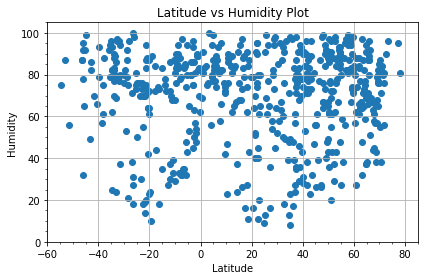

In [58]:
# scatter plot for Latitude vs Humidity Plot
x_values = city_weather_df['Lat']
y_values = city_weather_df['Humidity']

plt.scatter(x_values, y_values)
plt.title('Latitude vs Humidity Plot')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.ylim(0, 105)
plt.xlim(-60, 85)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.tight_layout()
plt.show()

## Latitude vs. Cloudiness Plot

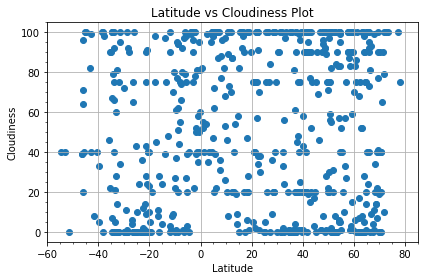

In [60]:
# scatter plot for Latitude vs Cloudiness Plot
x_values = city_weather_df['Lat']
y_values = city_weather_df['Cloudiness']

plt.scatter(x_values, y_values)
plt.title('Latitude vs Cloudiness Plot')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.ylim(-5, 105)
plt.xlim(-60, 85)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.tight_layout()
plt.show()

## Latitude vs. Wind Speed Plot

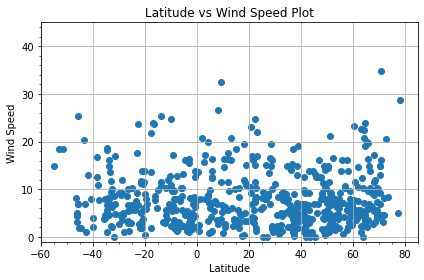

In [65]:
# scatter plot for Latitude vs Humidity Plot
x_values = city_weather_df['Lat']
y_values = city_weather_df['Wind Speed']

plt.scatter(x_values, y_values)
plt.title('Latitude vs Wind Speed Plot')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.ylim(-1, 45)
plt.xlim(-60, 85)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.tight_layout()
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


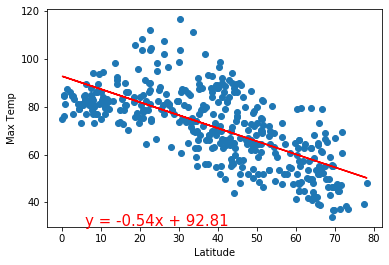

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


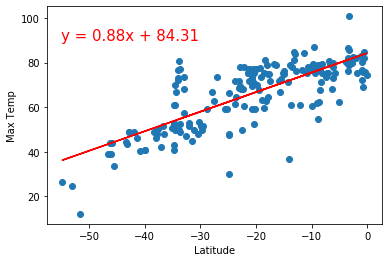

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


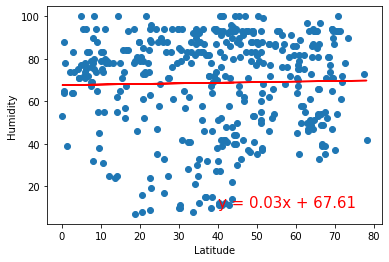

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


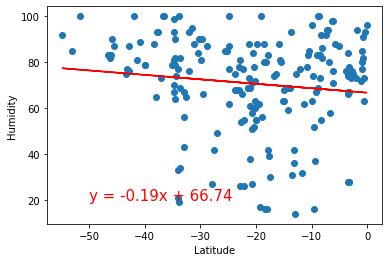

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


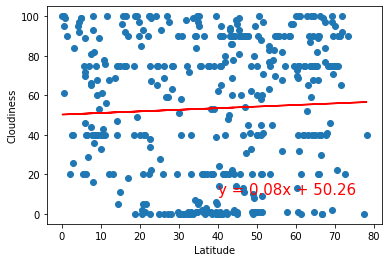

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


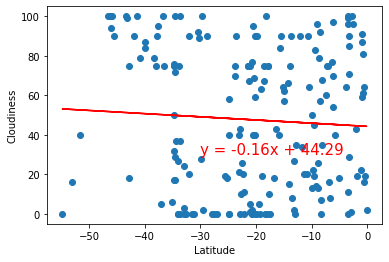

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


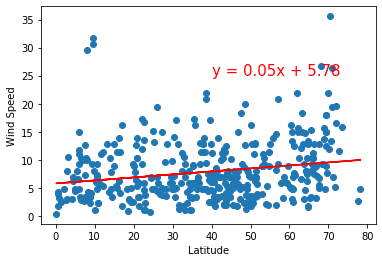

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


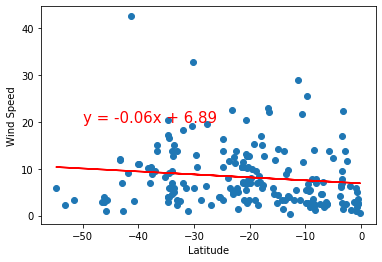